In [5]:
#Part A Part 1 Kmean
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [48]:
# Load your dataset
data = pd.read_csv("Datasets/q2_CCGENERAL.csv")

In [49]:
from sklearn.impute import SimpleImputer

X = data.iloc[:, 1:].values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

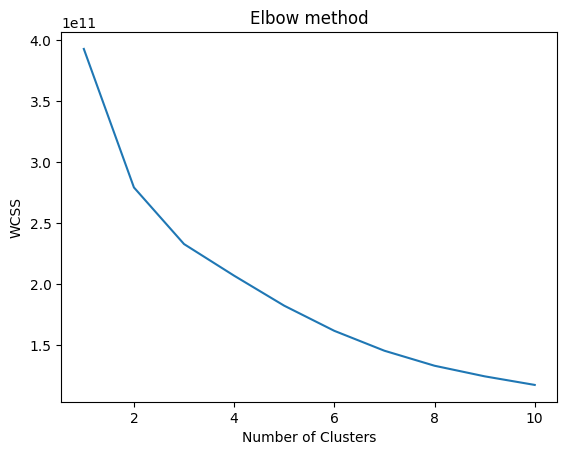

In [31]:
# Part A Part 1 Kmeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
from sklearn.metrics import silhouette_score
# Calculate silhouette scores for different number of clusters
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=10)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("\nFor n_clusters =", n_cluster, "The average silhouette_score is:", silhouette_avg)


For n_clusters = 2 The average silhouette_score is: 0.5145025569999819

For n_clusters = 3 The average silhouette_score is: 0.46504469672047805

For n_clusters = 4 The average silhouette_score is: 0.39826380503454617

For n_clusters = 5 The average silhouette_score is: 0.38626225666405734

For n_clusters = 6 The average silhouette_score is: 0.39134228093456086

For n_clusters = 7 The average silhouette_score is: 0.36812562302328267

For n_clusters = 8 The average silhouette_score is: 0.38176936640792936

For n_clusters = 9 The average silhouette_score is: 0.3846803842410628


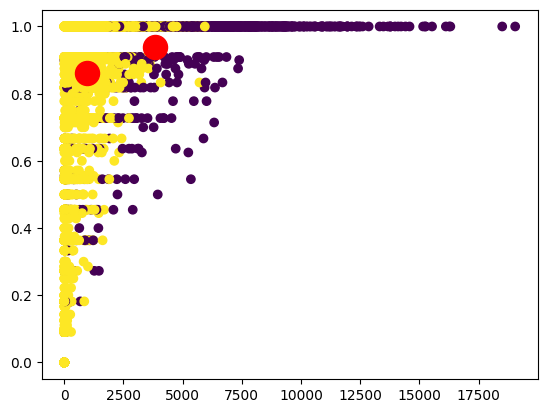

In [33]:
#Selecting 2 Clusters as shown by the elbow and the Silhouette method
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred_y, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

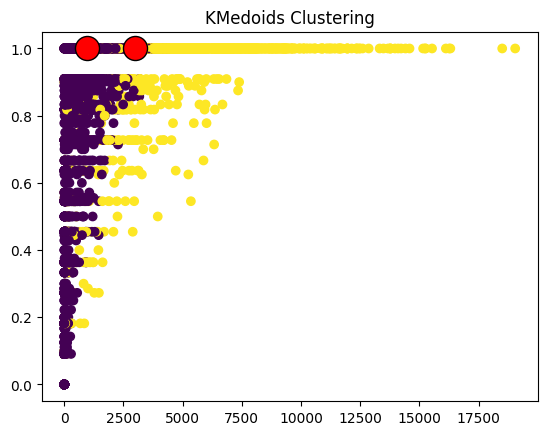

In [55]:
from sklearn.metrics import euclidean_distances
#Part A part2 KMedoids
import kmedoids
diss = euclidean_distances(X)
kmediod = kmedoids.KMedoids(2, method='fasterpam').fit(diss)
labels = kmediod.labels_
medoids_indices = kmediod.medoid_indices_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(X[medoids_indices, 0], X[medoids_indices, 1], s=300, c='red', marker='o', edgecolors='k')
plt.title('KMedoids Clustering')
plt.show()

In [34]:
#Part B
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc
import pandas as pd

In [36]:
df = pd.read_csv('Datasets/q2_CCGENERAL.csv')
X = df.drop(['CUST_ID'], axis = 1)
X.fillna(method = 'ffill', inplace = True)

C:\Users\Tayyab Anees\AppData\Local\Temp\ipykernel_20904\179535837.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method = 'ffill', inplace = True)


In [37]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
X_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146906,0.103137,-0.066350,-0.071056,-0.026406,-0.092925,0.252792,-0.135103,0.234873,-0.134444,-0.094773,-0.069757,-0.191193,-0.096793,-0.068374,0.235693,-0.820733
8946,-0.151150,0.105477,-0.067009,-0.072668,-0.025006,-0.095033,0.258527,-0.138169,0.240202,-0.137494,-0.096923,-0.071340,-0.195531,-0.102486,-0.069925,-0.106997,-0.839354
8947,-0.156989,-0.039327,-0.085230,-0.075682,-0.062527,-0.098974,0.181198,-0.143898,0.161244,-0.143196,-0.100942,-0.082828,-0.203640,-0.120989,-0.069834,0.069801,-0.874162
8948,-0.154334,-0.038414,-0.097250,-0.073925,-0.094148,-0.093066,-0.253040,-0.140558,-0.189920,0.032626,-0.037901,-0.122568,-0.227375,-0.120236,-0.070536,0.068181,-0.853872


In [38]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(X_normalized)
x_pca = pd.DataFrame(x_pca)
x_pca.columns = ['P1', 'P2']

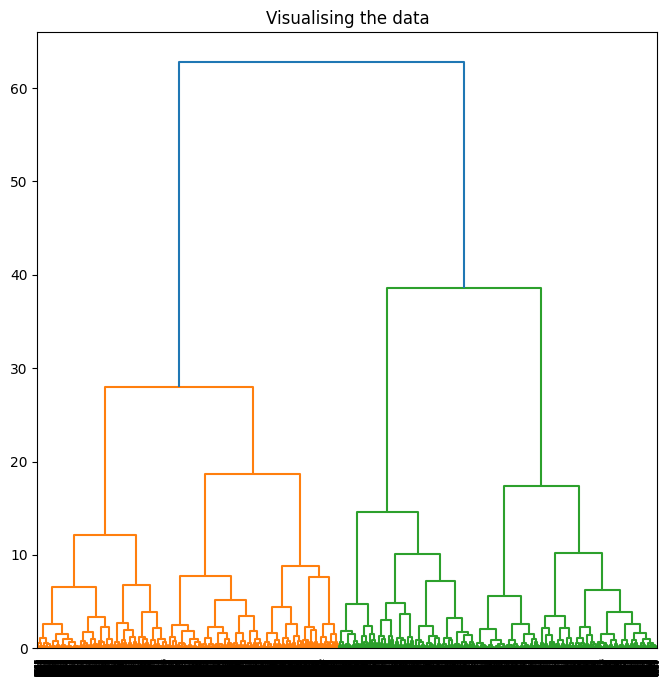

In [39]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(x_pca, method ='ward')))